In [1]:
import requests
response = requests.get("https://meritindia.in/state-data/arunachal-pradesh")
if response.status_code != 200:
	print("Error fetching page")
	exit()
else:
    print("connection allowed")

connection allowed


In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [3]:

div = soup.find("div", {"id": "ShowDetailsForMerit"})

content = str(div)

print(content)

<div id="ShowDetailsForMerit" style="display: none;">
<div class="col-md-12" style="padding-top: 30px; padding-left: 1px; padding-right: 1px; overflow-x: auto;">
<table class="toggle-square toggle-medium footable table tbl_smallFont table-striped table-bordered table-hover" data-sorting="true">
<thead>
<tr>
<th data-sort-ignore="true">
<label for="No">No</label>
</th>
<th>
<label for="Station" style="cursor:pointer;">Station</label>
</th>
<th data-type="numeric">
<label for="Plant_Capacity" style="cursor:pointer;">Plant Capacity</label><br/>
<label for="" style="cursor:pointer;">(MW)</label>
</th>
<th data-type="numeric">
<label for="Capacity_Allocated_to_State" style="cursor:pointer;">Capacity Allocated to State</label><br/>
<label for="" style="cursor:pointer;">(MW)</label>
</th>
<th>
<label for="Type_of_Station" style="cursor:pointer;">Type of Station</label>
</th>
<th>
<label for="Ownership" style="cursor:pointer;">Ownership</label>
</th>
<th data-type="numeric">
<label for="Variab

In [4]:
import pandas as pd

In [5]:
df=pd.read_excel("https://meritindia.in/StateWiseDetails/ExportToExcel?StateCode=ACP&RecordDate=11%20Mar%202022&DiscomCode=0")

In [38]:
df1=pd.read_csv("F:\Github\indian_state_code.csv")

In [7]:
for i in df1.State_code.unique():
    print(i)

AP
ACP
ASM
BHR
CHG
CTG
DNH
DND
DL
GOA
GJT
HRN
HP
JAK
JHK
KRT
KRL
MPD
MHA
MIP
MGA
MZM
NGD
ODI
PU
PNB
RJ
SKM
TND
TLG
TPA
UP
UTK
BGL


In [8]:
df=pd.read_excel("https://meritindia.in/StateWiseDetails/ExportToExcel?StateCode=BGL&RecordDate=11%20Mar%202022&DiscomCode=0")

In [9]:
all_india_data=pd.DataFrame()
    
for i in df1.State_code.unique():
    df2=pd.read_excel("https://meritindia.in/StateWiseDetails/ExportToExcel?StateCode={i}&RecordDate=11%20Mar%202022&DiscomCode=0".format(i=i))
    df2['state']=i
    all_india_data=all_india_data.append(df2,ignore_index=True)


C:\Users\Balram\AppData\Local\Temp/ipykernel_7836/476604036.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_india_data=all_india_data.append(df2,ignore_index=True)
C:\Users\Balram\AppData\Local\Temp/ipykernel_7836/476604036.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_india_data=all_india_data.append(df2,ignore_index=True)
C:\Users\Balram\AppData\Local\Temp/ipykernel_7836/476604036.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_india_data=all_india_data.append(df2,ignore_index=True)
C:\Users\Balram\AppData\Local\Temp/ipykernel_7836/476604036.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_india_data=a

In [11]:
all_india_data.to_csv("all_india_data.csv")

In [39]:
all_india_data.fillna(0,inplace=True)

In [40]:
df1.head()

,State_name,State_code
0,Andhra Pradesh,AP
1,Arunachal Pradesh,ACP
2,Assam,ASM
3,Bihar,BHR
4,Chandigarh,CHG


In [41]:
all_india_data.head()

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name,State_code,must_run
0,KORBA ST 3,0.0,0.0,Thermal,State Generation,1.38,1.38,2.76,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run
1,KORBA SUPER THERMAL PS 1,0.0,0.0,Thermal,State Generation,1.42,0.68,2.10,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run
2,SIPAT TERMAL POWER STATION 1,0.0,0.0,Thermal,State Generation,1.43,1.30,2.73,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run
3,SIPAT 2,0.0,0.0,Thermal,State Generation,1.48,1.24,2.72,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run
4,TALCHER STPS-2,180.0,2000.0,Thermal,Central ISGS,1.75,0.71,2.46,4055.0,4055.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run


In [42]:
all_india_data=all_india_data.merge(df1,left_on='state',right_on='State_code',how='outer')

In [45]:
all_india_data.head()

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name_x,State_code_x,must_run,State_name_y,State_code_y
0,KORBA ST 3,0.0,0.0,Thermal,State Generation,1.38,1.38,2.76,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
1,KORBA SUPER THERMAL PS 1,0.0,0.0,Thermal,State Generation,1.42,0.68,2.10,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
2,SIPAT TERMAL POWER STATION 1,0.0,0.0,Thermal,State Generation,1.43,1.30,2.73,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
3,SIPAT 2,0.0,0.0,Thermal,State Generation,1.48,1.24,2.72,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
4,TALCHER STPS-2,180.0,2000.0,Thermal,Central ISGS,1.75,0.71,2.46,4055.0,4055.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP


In [17]:
# all_india_data.State_name.replace({'Jammu and Kashmir':'Jammu & Kashmir'},inplace=True)

In [47]:
map_data=all_india_data.groupby('State_name_y')['Capacity Allocated to State (MW)'].sum().reset_index()

In [48]:

map_data.loc[len(map_data.index)] = ['Ladakh',0.0] 

In [51]:
import plotly.graph_objects as go
import plotly.express as px
 

fig=px.choropleth(map_data,  # Input data
                    locations='State_name_y',
                    color='Capacity Allocated to State (MW)',  
                    hover_name='State_name_y',
                    hover_data={'Capacity Allocated to State (MW)':':.2f'},
                    scope='asia',
                    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
                    featureidkey='properties.ST_NM',
                    )
fig.update_geos(fitbounds='locations',visible=False)
fig.show()
              



In [138]:
all_india_data['must_run_status']=np.where(all_india_data['Type Of Station'].isin(['Nuclear', 'Hydro', 'Renewable', 0]),"must_run","non_must_run")

In [53]:
all_india_data.tail()

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name_x,State_code_x,must_run,State_name_y,State_code_y
1406,KAHALGAON-II,13.0,1500.0,Thermal,Central ISGS,0.0,0.0,0.0,0.0,0.0,0.0,0,BGL,West Bengal,BGL,non_must_run,West Bengal,BGL
1407,TALCHER,94.0,1000.0,Thermal,Central ISGS,0.0,0.0,0.0,0.0,0.0,0.0,0,BGL,West Bengal,BGL,non_must_run,West Bengal,BGL
1408,RANGEET,17.0,60.0,Hydro,Central ISGS,0.0,0.0,0.0,0.0,0.0,0.0,0,BGL,West Bengal,BGL,must_run,West Bengal,BGL
1409,TEESTA,121.0,510.0,Hydro,Central ISGS,0.0,0.0,0.0,0.0,0.0,0.0,0,BGL,West Bengal,BGL,must_run,West Bengal,BGL
1410,TALA,386.0,1020.0,Hydro,Other ISGS,0.0,0.0,0.0,0.0,0.0,0.0,0,BGL,West Bengal,BGL,must_run,West Bengal,BGL


In [54]:
all_india_data['Type Of Station'].unique()

array(['Thermal', 'Gas', 'Nuclear', 'Hydro', 'Renewable', 0], dtype=object)

<AxesSubplot:ylabel='Capacity Allocated to State (MW)'>

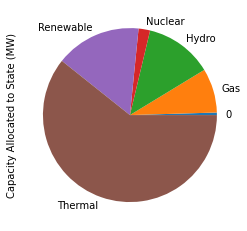

In [55]:
all_india_data.groupby('Type Of Station')['Capacity Allocated to State (MW)'].sum().plot.pie()

<AxesSubplot:ylabel='Capacity Allocated to State (MW)'>

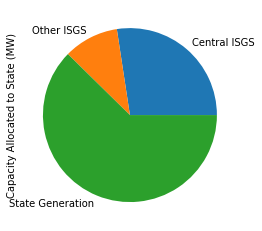

In [56]:
all_india_data.groupby('Ownership')['Capacity Allocated to State (MW)'].sum().plot.pie()

In [57]:
all_india_data.sort_values(by=['must_run','Variable Cost (Rs/Unit)'],axis=0,ascending=[True,True])

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name_x,State_code_x,must_run,State_name_y,State_code_y
42,MACHKUND HES,0.0,960.0,Hydro,State Generation,0.00,1.15,1.15,581.0,581.0,0.0,0,AP,Andhra Pradesh,AP,must_run,Andhra Pradesh,AP
43,T. B. DAM (SHARE),0.0,0.0,Hydro,State Generation,0.00,0.00,0.00,528.0,528.0,0.0,0,AP,Andhra Pradesh,AP,must_run,Andhra Pradesh,AP
45,DONKARAI HES,0.0,0.0,Hydro,State Generation,0.00,0.00,0.00,314.0,314.0,0.0,0,AP,Andhra Pradesh,AP,must_run,Andhra Pradesh,AP
46,LOWER SILERU,460.0,460.0,Hydro,State Generation,0.00,1.02,1.02,3743.0,3743.0,0.0,0,AP,Andhra Pradesh,AP,must_run,Andhra Pradesh,AP
47,SRISAILAM RB,770.0,770.0,Hydro,State Generation,0.00,1.73,1.73,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,must_run,Andhra Pradesh,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,GSEG_2_SPOT,351.0,351.0,Gas,State Generation,21.18,1.15,22.33,0.0,0.0,0.0,0,GJT,Gujarat,GJT,non_must_run,Gujarat,GJT
434,DHUVARAN CCPP-II GSPC SPOT GAS,112.0,112.0,Gas,State Generation,22.31,0.72,23.03,0.0,0.0,0.0,0,GJT,Gujarat,GJT,non_must_run,Gujarat,GJT
435,DHUVARAN CCPP-I GSPC SPOT GAS,107.0,107.0,Gas,State Generation,22.31,0.72,23.03,0.0,0.0,0.0,0,GJT,Gujarat,GJT,non_must_run,Gujarat,GJT
436,GSEG_SPOT,156.0,156.0,Gas,State Generation,22.88,0.46,23.34,0.0,0.0,0.0,0,GJT,Gujarat,GJT,non_must_run,Gujarat,GJT


In [71]:
df2=pd.read_csv("Use_map_state.csv")

In [72]:
df2

,S.NO.,State
0,1,Andaman & Nicobar
1,2,Andhra Pradesh
2,3,Arunachal Pradesh
3,4,Assam
4,5,Bihar
5,6,Chandigarh
6,7,Chhattisgarh
7,8,Dadra & Nagar Haveli
8,9,Daman & Diu
9,10,Delhi


In [88]:
all_india_data['State_code_x'].replace({'Dadra and Nagar Haveli	':'Dadra & Nagar Haveli	','Daman and Diu	':'Daman & Diu'},inplace=True)

In [102]:
all_india_data.head()

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name_x,State_code_x,must_run,State_name_y,State_code_y
0,KORBA ST 3,0.0,0.0,Thermal,State Generation,1.38,1.38,2.76,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
1,KORBA SUPER THERMAL PS 1,0.0,0.0,Thermal,State Generation,1.42,0.68,2.10,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
2,SIPAT TERMAL POWER STATION 1,0.0,0.0,Thermal,State Generation,1.43,1.30,2.73,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
3,SIPAT 2,0.0,0.0,Thermal,State Generation,1.48,1.24,2.72,0.0,0.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP
4,TALCHER STPS-2,180.0,2000.0,Thermal,Central ISGS,1.75,0.71,2.46,4055.0,4055.0,0.0,0,AP,Andhra Pradesh,AP,non_must_run,Andhra Pradesh,AP


In [34]:
# df1['State_name'].replace({'Jammu and Kashmir':'Jammu & Kashmir'},inplace=True)
# df1

,State_name,State_code
0,Andhra Pradesh,AP
1,Arunachal Pradesh,ACP
2,Assam,ASM
3,Bihar,BHR
4,Chandigarh,CHG
5,Chhattisgarh,CTG
6,Dadra and Nagar Haveli,DNH
7,Daman and Diu,DND
8,Delhi,DL
9,Goa,GOA


In [145]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
from dash import no_update
from plotly.subplots import make_subplots
app = dash.Dash(
    external_stylesheets=[dbc.themes.BOOTSTRAP])


tech_list=all_india_data['Type Of Station'].unique()
tech_list=tech_list[:-1]
state_list=all_india_data['State_name_x'].unique()

app.layout=dbc.Container([
    dbc.Row(
        dbc.Col(html.H1("Energy Dashboard",
                        className='text-center text-primary mb-4'),
                width=12,style={"background-color": "orange"})
    ),

    dbc.Row([

        dbc.Col([
            dcc.Dropdown(id='my-dpdn', multi=False, value='Thermal',placeholder="Select fuel type",
                         options=[{'label':x, 'value':x}
                                  for x in tech_list],style={"background-color": "pink"}
                         )
        ],width=6
        ), 

        dbc.Col([
            dcc.Dropdown(id='my-dpdn2', multi=False, value='Jharkhand',placeholder="Select state",style={"background-color": "pink"},
                         options=[{'label':x, 'value':x}
                                  for x in state_list],
                         )
            

            ],width=6
            ),


            

    ]),  # Horizontal:start,center,end,between,around

    dbc.Row([

        dbc.Col([
            dcc.Graph(id='map-fig', figure={
           })
        ],width=6,xs=12, sm=12, md=12, lg=6, xl=6
        ), 

        dbc.Col([
            dcc.Graph(id='pie1-fig', figure={
               })
            ],width=3,xs=12, sm=12, md=12, lg=3, xl=3
            ),
        dbc.Col([
            dcc.Graph(id='pie2-fig', figure={
                })
            

            ],width=3,xs=12, sm=12, md=12, lg=3, xl=3
            )


            

    ]),

    dbc.Row([
            
            dcc.Graph(id='merit_order', figure={}),
        ]
        # , #width={'size':5, 'offset':1},
        #    xs=12, sm=12, md=12, lg=5, xl=5
        ),

],fluid=True,style={"background-color": "pink"})


# Callback section: connecting the components
# ************************************************************************
# Line chart - Single
@app.callback(
    Output('map-fig', 'figure'),
    Input('my-dpdn', 'value')
)
def update_graph(fuel_slctd):
    dff=all_india_data[all_india_data['Type Of Station']==fuel_slctd]
    map_data=dff.groupby('State_name_x')['Capacity Allocated to State (MW)'].sum().reset_index()
    map_data=df2.merge(map_data,left_on='State',right_on='State_name_x',how='outer')
    map_data['Capacity Allocated to State (MW)'].fillna(0,inplace=True)
    
    fig=px.choropleth(map_data,  # Input data
                    locations='State',
                    color='Capacity Allocated to State (MW)',  
                    hover_name='State',
                    hover_data={'Capacity Allocated to State (MW)':':.2f'},
                    scope='asia',
                    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
                    featureidkey='properties.ST_NM',
                    )
    fig.update_geos(fitbounds='locations',visible=False)
    fig.update_layout(geo=dict(bgcolor= 'pink'),plot_bgcolor='pink',paper_bgcolor='pink',font={'color':'black'},title_text='Technology-wise Distribution', title_x=0.4,)
    fig.show()
    return fig


# Line chart - multiple
@app.callback(
    Output('pie1-fig', 'figure'),
    Output('pie2-fig', 'figure'),
    Output('merit_order', 'figure'),
    Input('my-dpdn2', 'value')
)
def update_graph(state_slctd):
    dff=all_india_data[all_india_data['State_name_x']==state_slctd]
    station_data=dff.groupby('Type Of Station')['Capacity Allocated to State (MW)'].sum().reset_index()
    owner_data=dff.groupby('Ownership')['Capacity Allocated to State (MW)'].sum().reset_index()
    merit=dff.sort_values(by=['must_run_status','Variable Cost (Rs/Unit)'],axis=0,ascending=[True,True])
    fig1= px.pie(data_frame=station_data, values='Capacity Allocated to State (MW)', names='Type Of Station')
    fig1.update_layout(title_text='% of Capacity allocated by Fuel type', title_x=0.5,plot_bgcolor='pink',paper_bgcolor='pink',font={'color':'black'})
    fig2= px.pie(data_frame=owner_data, values='Capacity Allocated to State (MW)', names='Ownership')
    fig2.update_layout(title_text='% of Capacity allocated by Owner', title_x=0.5,plot_bgcolor='pink',paper_bgcolor='pink',font={'color':'black'})
    fig3 = px.bar(merit, x='Station', y='Variable Cost (Rs/Unit)',color='must_run',hover_data=['must_run','Capacity Allocated to State (MW)'])
    fig3.update_layout(title_text='Merit Order of {i}'.format(i=state_slctd), title_x=0.5,height=600,plot_bgcolor='pink',paper_bgcolor='pink',font={'color':'black','size':15})
    return (fig1,fig2,fig3)





if __name__=='__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_favicon.ico?v=2.2.0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


127.0.0.1 - - [15/Mar/2022 19:57:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:57:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:58:06] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Mar/2022 19:58:16] "POST /_dash-update-component HTTP/1.1" 200 -


In [125]:
india_json=pd.read_json("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

In [37]:
india_json.to_json("use_india_json.geojson")

In [89]:
map_data=all_india_data.groupby('State_name_x')['Capacity Allocated to State (MW)'].sum().reset_index()
map_data=df2.merge(map_data,left_on='State',right_on='State_name_x',how='outer')

In [90]:
map_data['Capacity Allocated to State (MW)'].fillna(0,inplace=True)

In [91]:
map_data

,S.NO.,State,State_name_x,Capacity Allocated to State (MW)
0,1.0,Andaman & Nicobar,NaN,0.0
1,2.0,Andhra Pradesh,Andhra Pradesh,13937.0
2,3.0,Arunachal Pradesh,Arunachal Pradesh,160.0
3,4.0,Assam,Assam,1502.0
4,5.0,Bihar,Bihar,4885.0
5,6.0,Chandigarh,Chandigarh,412.0
6,7.0,Chhattisgarh,Chhattisgarh,5557.0
7,8.0,Dadra & Nagar Haveli,NaN,0.0
8,9.0,Daman & Diu,NaN,0.0
9,10.0,Delhi,Delhi,5492.0


In [94]:
x=all_india_data['Type Of Station'].unique()

In [98]:
all_india_data[all_india_data['State_name_x']=='Jharkhand']

,Station,Capacity Allocated to State (MW),Plant Capacity (MW),Type Of Station,Ownership,Variable Cost (Rs/Unit),Fixed Cost (Rs/Unit),Total Cost (Rs/Unit),Declared Capability (MWh),Schedule (MWh),Deviation from Merit Order (MWh),Reason for Deviation / Remarks(if any),state,State_name_x,State_code_x,must_run,State_name_y,State_code_y
666,NTPC DARIPALI,74.0,1600.0,Thermal,Central ISGS,1.11,2.41,3.52,1578.0,1521.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
667,TEESTA,63.0,510.0,Hydro,Central ISGS,1.16,1.06,2.22,414.0,398.0,0.0,0,JHK,Jharkhand,JHK,must_run,Jharkhand,JHK
668,KORBA UNIT 7,0.0,500.0,Thermal,State Generation,1.34,1.50,2.84,1125.0,1084.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
669,RANGEET,4.0,60.0,Hydro,Central ISGS,1.91,1.94,3.85,57.0,5.0,0.0,0,JHK,Jharkhand,JHK,must_run,Jharkhand,JHK
670,TALCHER,89.0,1000.0,Thermal,Central ISGS,2.04,1.02,3.06,1711.0,1648.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
671,KAHALGAON-II,46.0,1500.0,Thermal,Central ISGS,2.10,1.38,3.48,281.0,270.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
672,NABINAGAR POWER GENERATING COMPANY,20.0,1980.0,Thermal,State Generation,2.12,2.30,4.42,973.0,937.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
673,TALA,117.0,1020.0,Hydro,Other ISGS,2.16,0.00,2.16,0.0,0.0,0.0,0,JHK,Jharkhand,JHK,must_run,Jharkhand,JHK
674,KAHALGAON - I,28.0,840.0,Thermal,Central ISGS,2.22,1.18,3.40,588.0,566.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK
675,KANTI THERMAL POWER STATION,13.0,195.0,Thermal,State Generation,2.49,2.31,4.80,292.0,281.0,0.0,0,JHK,Jharkhand,JHK,non_must_run,Jharkhand,JHK


array(['Thermal', 'Gas', 'Nuclear', 'Hydro', 'Renewable'], dtype=object)